# Kernel Principal Component Analysis
In a linear PCA, the clusterings of samples are linearly separated. That is, you could draw a line between sample clusters and they would almost be perfectly separated. However, some data sets don't have linearly separated sample clusters, so instead you would use the kernel-trick to separate those clusters by going from a higher dimension back to a lower dimension.

### Linear PCA
<img src="images/k_pca/linear_pca.png" height="60%" width="60%"></img>

The diagram above is a logistic regression model predicting either 1 (red), 2 (green), or 3 (blue) using the data set that fitted using linear PCA.

There exist linear separators that separate the classifications. This is because the standard PCA uses the kernel to fit to the data set, so such a separation is created.

### Kernel PCA
<img src="images/k_pca/kernel_pca.png" height="60%" width="60%"></img>

The diagram above is a logistic regression model predicting either 1 (red) or 2 (green) using a different data set that fitted using kernel PCA.

Although it looks linear, if you zoom-in to the separator there exists a non-linear separator that separates the classifications. This is because the Kernel PCA uses the rbf kernel to fit to the data set, so such a separation is created.

In [28]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# import the data set
ads_df = pd.read_csv("datasets/social_network_ads.csv")

ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
# x is the Age and Estimated Salary columns
x = ads_df.iloc[:, [2, 3]].values

# y is the Purchased column
y = ads_df.iloc[:, 4].values

In [31]:
# split the data set into training and testing data sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [32]:
# import a Standarization Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler

# feature scale the training and testing sets
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Kernel PCA Model
There is no attribute called "explained_variance_ratio_" for the Kernel PCA because the PCA could not linearly separate the principal components, thus the ratios may not sum to 100%. For this reason, the attribute is not provided because it could be skewed due to non-linear separation.

Another issue is that the "components_" attribute is not provided in Kernel PCA, so we cannot graph the data set's eigenvalues for each principal component.

In [33]:
# import the Kernel PCA model
from sklearn.decomposition import KernelPCA

In [34]:
# create a Kernel PCA with 2 principal components
kpca = KernelPCA(n_components=2, kernel="rbf")

# fit the x_train, then transform the x_train and x_test 
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

"""
show the first 10 rows of the training set

As seen below, there are only 2 independent variables (PC1 and PC2).
"""
x_train[:10]

array([[-0.38360744,  0.40495793],
       [-0.51136881,  0.11863662],
       [ 0.60682913,  0.27848533],
       [ 0.57843411,  0.14882134],
       [-0.46443731, -0.13653412],
       [-0.2304985 , -0.21104824],
       [-0.06718468, -0.27647675],
       [-0.42626911,  0.39225335],
       [-0.29067565, -0.57335305],
       [-0.03726819, -0.51598901]])

# Logistic Regression Model
Let's use a logistic regression model on the transformed data set from the Kernel PCA, and let's see how well the model predicts the test set.

In [35]:
# import the logistic regression class
from sklearn.linear_model import LogisticRegression

In [36]:
# create a logistic regression classifier with a random state (seed) of 0, then fit to training set
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
# predict x_test
y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

# Confusion Matrix
Let's create a confusion matrix for the logistic regression model.

Based on the confusion matrix, we received 35 correct predictions and 1 incorrect prediction, so the accuracy of the model is ~90%. This high accuracy is probably because there are now only 2 independent variables (PC1 and PC2) that explain the majority variance of the data set. Hence, those 2 principal components became great predictors for the model.

In [38]:
# import the confusion matrix function
from sklearn.metrics import confusion_matrix

In [39]:
# create a confusion matrix that compares the y_test (actual) to the y_pred (prediction)
cm = confusion_matrix(y_test, y_pred)

"""
Read the Confusion Matrix diagonally:
54 + 18 = 72 correct predictions
4 + 4 = 8 incorrect predictions
"""
cm

array([[54,  4],
       [ 4, 18]])

# Visualization of Results
Although it looks linear, if you zoom-in to the separator it actually shows some rough edges which denotes that the separator is not a linear.

In [40]:
# import a listed color map
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


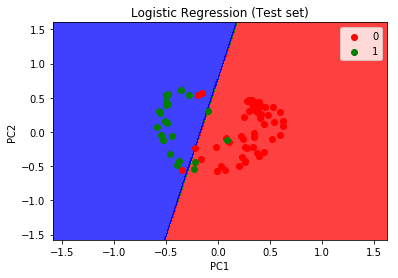

In [41]:
# create a red (Purchased) and green (Not Purchased) separation at the classifier's threshold
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# scatter each data point from the training set: red = Purchased, green = Not Purchased
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# add labels (the axes are the two independent variables), then show the graph  
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()